In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../src')  # Go one level up and then into src
from SMF import SMF_BCD

/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:132: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:180: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:249: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1305: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1626: SyntaxWarning: invalid escape sequence '\h'
  '''


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)
    

(9, 70000)


In [4]:
### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(70000, 784)


In [5]:
n_components = 16

SMF_Train = SMF_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=True, threshhold=0.5)

initial loading beta [[-0.24713208 -0.16502029 -0.72739415  0.93740522  0.51324877  0.16835589
  -0.1022606  -0.71414949 -0.91360427  0.14114404 -0.99973786  0.93778418
  -0.3561813  -0.90874098  0.33421005 -0.27464951  0.15691223]
 [-0.35659867 -0.39145795  0.66841967 -0.21682826 -0.39745092 -0.07252743
   0.66093681 -0.29065461 -0.69934996  0.86267101  0.24282517 -0.50167731
  -0.22346797 -0.67118657 -0.91999964 -0.10864069 -0.40296393]
 [ 0.77645672 -0.55410985 -0.6941362   0.58460348 -0.59209899 -0.00550819
  -0.26616368 -0.77187849  0.43833679  0.33279792  0.71018766  0.4767192
  -0.37557289 -0.31966027 -0.68338665 -0.46639498 -0.32930403]
 [ 0.25647514 -0.57525013 -0.80713845 -0.61394304  0.35021833  0.86025939
   0.61881346 -0.05923469 -0.49361872 -0.5724619  -0.7896673  -0.61322604
  -0.07321513 -0.76869216 -0.50757986  0.23369111  0.24680886]
 [-0.89704298 -0.85825547 -0.13348194  0.63534402 -0.38931553 -0.51280816
   0.549509    0.81273401  0.50274853 -0.22174298  0.06447141 

 10%|█         | 10/100 [00:41<07:18,  4.87s/it]

!!! pred_type filter


 11%|█         | 11/100 [00:48<07:48,  5.26s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559165,   7738],
       [ 22438,  40659]]), np.float64(0.952)]


 20%|██        | 20/100 [01:30<06:19,  4.75s/it]

!!! pred_type filter


 21%|██        | 21/100 [01:35<06:20,  4.81s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559546,   7357],
       [ 18600,  44497]]), np.float64(0.959)]


 30%|███       | 30/100 [02:18<05:33,  4.76s/it]

!!! pred_type filter


 31%|███       | 31/100 [02:23<05:31,  4.80s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559787,   7116],
       [ 17097,  46000]]), np.float64(0.962)]


 40%|████      | 40/100 [02:58<04:04,  4.07s/it]

!!! pred_type filter


 41%|████      | 41/100 [03:02<04:02,  4.11s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559803,   7100],
       [ 16331,  46766]]), np.float64(0.963)]


 50%|█████     | 50/100 [03:43<04:00,  4.80s/it]

!!! pred_type filter


 51%|█████     | 51/100 [03:48<03:59,  4.88s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559829,   7074],
       [ 15865,  47232]]), np.float64(0.964)]


 60%|██████    | 60/100 [04:27<02:52,  4.32s/it]

!!! pred_type filter


 61%|██████    | 61/100 [04:32<02:55,  4.51s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559833,   7070],
       [ 15575,  47522]]), np.float64(0.964)]


 70%|███████   | 70/100 [05:13<02:00,  4.03s/it]

!!! pred_type filter


 71%|███████   | 71/100 [05:18<02:07,  4.40s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559901,   7002],
       [ 15384,  47713]]), np.float64(0.964)]


 80%|████████  | 80/100 [06:02<01:37,  4.89s/it]

!!! pred_type filter


 81%|████████  | 81/100 [06:10<01:49,  5.76s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559901,   7002],
       [ 15289,  47808]]), np.float64(0.965)]


 90%|█████████ | 90/100 [06:53<00:44,  4.47s/it]

!!! pred_type filter


 91%|█████████ | 91/100 [06:59<00:42,  4.71s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559937,   6966],
       [ 15195,  47902]]), np.float64(0.965)]


100%|██████████| 100/100 [07:42<00:00,  4.62s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[559892,   7011],
       [ 15086,  48011]]), np.float64(0.965)]


In [6]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [7]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.86


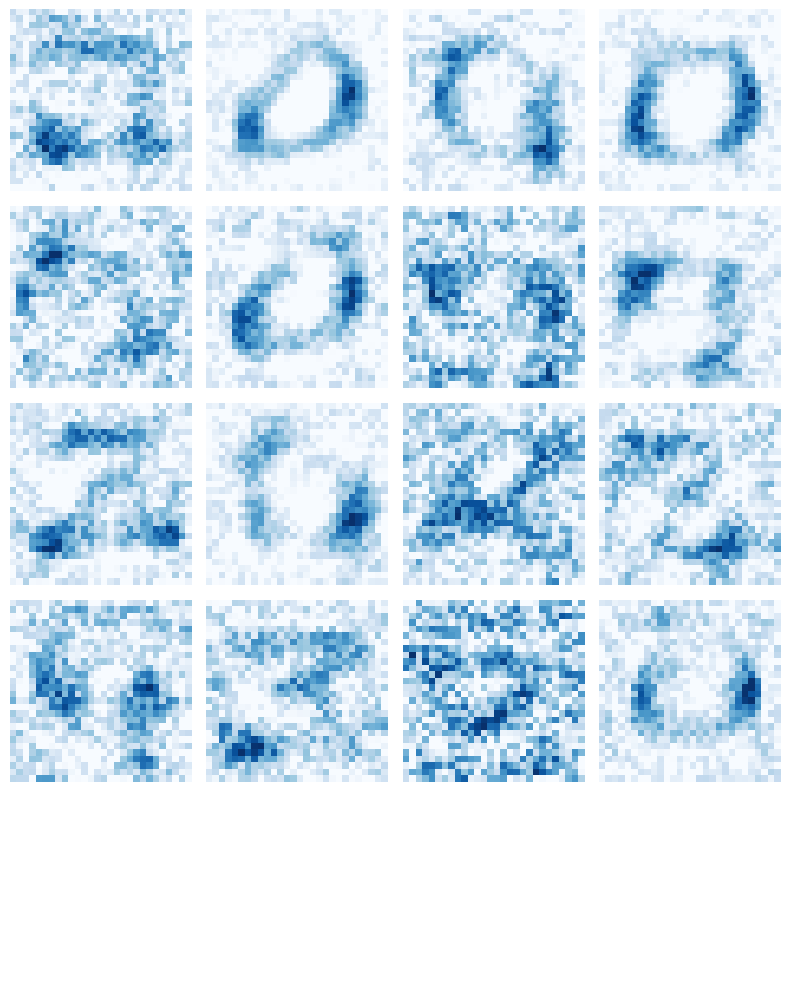

In [11]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)

images_per_row = 4
n_rows = len(image) // images_per_row + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("MINIST")

# Display the plot if needed
plt.show()

In [12]:
print(beta.T[0])

[-8.66388865  0.06041741 -0.03536996 -1.51563364  1.35672452 -1.35471623
 -1.34750462  1.76427491 -0.51221079]
